In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
plt.style.use('seaborn-v0_8-whitegrid')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
ruta = '/content/drive/MyDrive/ia/Parcial2/Dataset/Malware and goodware/DynamicMalwareMatrix2.csv'
df = pd.read_csv(ruta)

print("Número de filas y columnas:", df.shape)
print("\nColumnas:")
print(df.columns.tolist())

print("\nPrimeras filas:")
display(df.head())

Número de filas y columnas: (34371, 501)

Columnas:
['labels', '00', '0000', '0000000', '000000000046', '00021401', '00c04fc295ee', '01', '0156250', '02', '03', '04', '05', '06', '07', '08', '08002b30309d', '09', '096', '0_x64__8wekyb3d8bbwe', '0e5aae11', '0x0', '0x1', '10', '1000', '1004', '101', '1012', '1036', '1069', '11', '1148', '11cf', '11d0', '11d1', '12', '128', '13', '14', '144', '1440', '1496', '15', '16', '17', '17763', '17763_neutral_neutral_cw5n1h2txyewy', '18', '1836', '189871a37d4dc8849f801e42ea1b8d09167cba5fd9d0b2dadafd002ff99e33ee', '19', '192', '1940', '20', '2018', '2019', '2022', '2040', '20d04fe0', '21', '2103', '22', '2269080069', '23', '2372', '24', '25', '26', '2684', '27', '28', '2828', '288', '29', '30', '3020', '30319_32', '3036', '3052', '3064', '307355e4b60e', '3084', '31', '3156', '3168', '319b4a97ea03', '32', '320', '3240', '328', '33', '3364', '34', '3461203602', '35', '36', '37', '3780', '38', '384', '3876', '3884', '39', '3908', '3aea', '40', '4048', 

,labels,00,0000,0000000,000000000046,00021401,00c04fc295ee,01,0156250,02,...,windowsruntime,winevt,wmiprvse,working,wow6432node,write,writefile,xaml,xls,zip
0,1,11,0,5,0,0,0,1,6,0,...,0,0,0,36,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,19,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,3,0,...,0,0,0,8,0,0,0,0,0,0
3,1,52,0,2,0,0,0,2,0,6,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


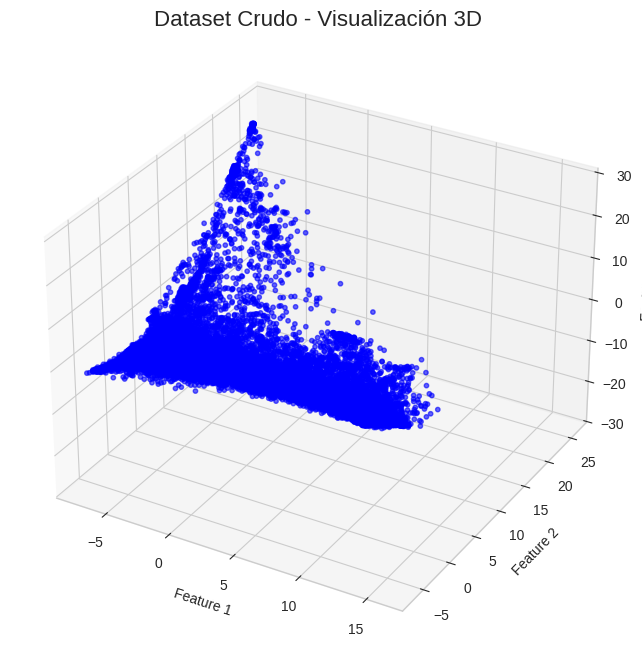

In [10]:
# VISUALIZACIÓN 3D DEL DATASET

from mpl_toolkits.mplot3d import Axes3D

# Eliminamos columnas no numéricas
df_numerico = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerico)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(df_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], s=10, color='blue', alpha=0.6)
ax.set_title("Dataset Crudo - Visualización 3D", fontsize=16)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

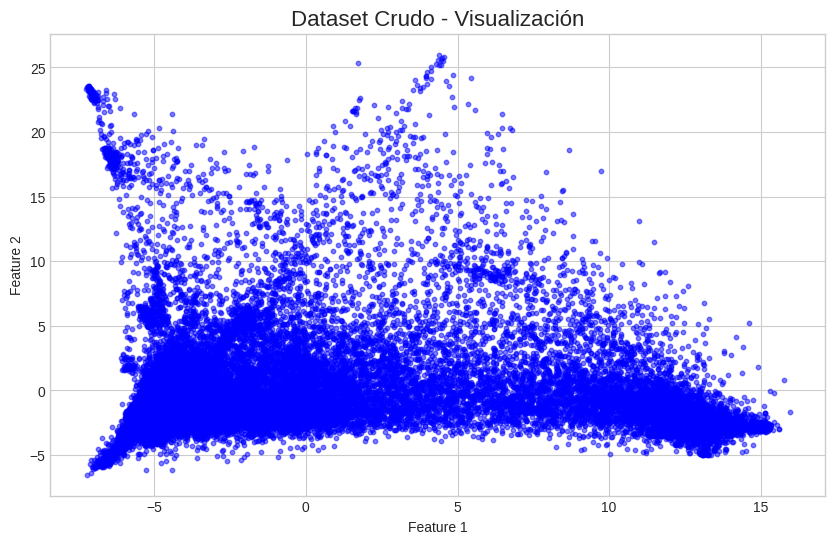

In [11]:
# VISUALIZACIÓN SIMPLE 2D
# Preparamos los datos numéricos
df_numerico = df.select_dtypes(include=[np.number])

# Normalizamos y aplicamos PCA
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(df_numerico)

pca = PCA(n_components=2)
X = pca.fit_transform(datos_normalizados)

# Visualizamos el dataset crudo (estilo del ingeniero)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, color='blue', alpha=0.5)
plt.title("Dataset Crudo - Visualización", fontsize=16)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# **APLICANDO K_MEANS**

Distancia Euclidiana

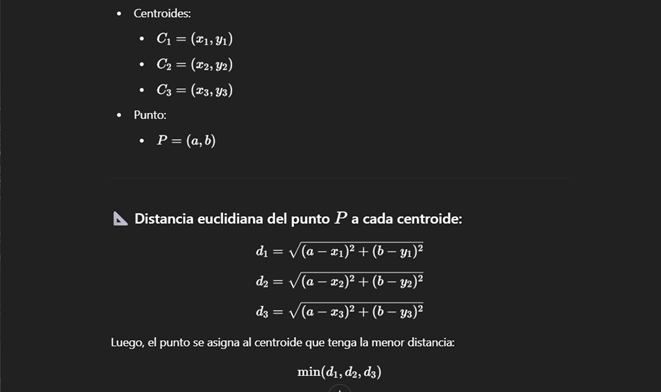

Columnas del dataset: ['labels', '00', '0000', '0000000', '000000000046', '00021401', '00c04fc295ee', '01', '0156250', '02', '03', '04', '05', '06', '07', '08', '08002b30309d', '09', '096', '0_x64__8wekyb3d8bbwe', '0e5aae11', '0x0', '0x1', '10', '1000', '1004', '101', '1012', '1036', '1069', '11', '1148', '11cf', '11d0', '11d1', '12', '128', '13', '14', '144', '1440', '1496', '15', '16', '17', '17763', '17763_neutral_neutral_cw5n1h2txyewy', '18', '1836', '189871a37d4dc8849f801e42ea1b8d09167cba5fd9d0b2dadafd002ff99e33ee', '19', '192', '1940', '20', '2018', '2019', '2022', '2040', '20d04fe0', '21', '2103', '22', '2269080069', '23', '2372', '24', '25', '26', '2684', '27', '28', '2828', '288', '29', '30', '3020', '30319_32', '3036', '3052', '3064', '307355e4b60e', '3084', '31', '3156', '3168', '319b4a97ea03', '32', '320', '3240', '328', '33', '3364', '34', '3461203602', '35', '36', '37', '3780', '38', '384', '3876', '3884', '39', '3908', '3aea', '40', '4048', '4096304019', '41', '42', '424

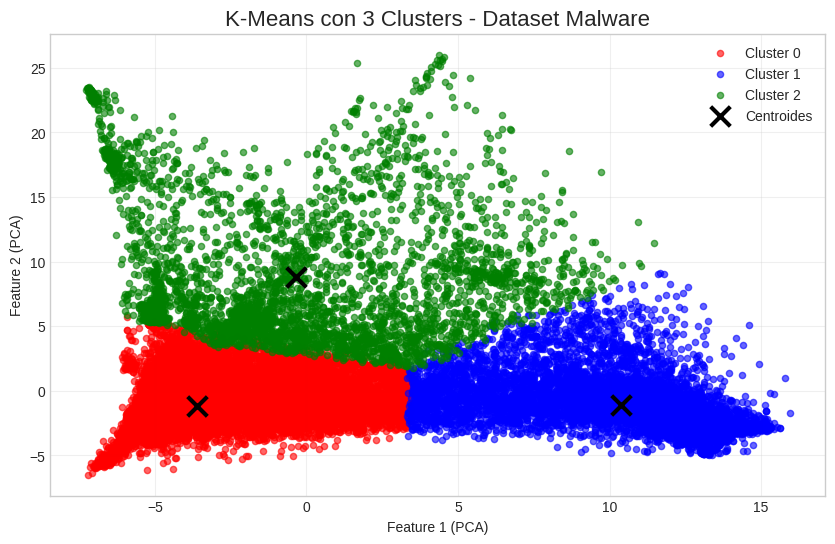


Coordenadas de los centroides:
Cluster 0: (-3.612, -1.202)
Cluster 1: (10.381, -1.065)
Cluster 2: (-0.350, 8.776)


In [17]:
# PARTE 4: APLICAMOS K-MEANS AL DATASET DE MALWARE (SIN ETIQUETAS)

print("Columnas del dataset:", df.columns.tolist())
# Identificamos y eliminamos la columna que tiene bueno las etiquetas
columna_etiquetas = 'labels'

if columna_etiquetas in df.columns:
    # Guardamos las etiquetas verdaderas para comparar después (pero no las usamos en clustering)
    y_true = df[columna_etiquetas]
    print(f"Etiquetas guardadas: {y_true.unique()}")

    # Eliminamos la columna de etiquetas del dataset
    df_sin_etiquetas = df.drop(columns=[columna_etiquetas])
else:
    print(f" No se encontró la columna")

# Tomamos solo las columnas numéricas
df_numerico = df_sin_etiquetas.select_dtypes(include=[np.number])

scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(df_numerico)
pca = PCA(n_components=3)
X = pca.fit_transform(datos_normalizados)

# APLICAMOS K-MEANS CON 2 CLUSTERS
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(X)

print(f"Clusters encontrados: {np.unique(y_pred)}")
print(f"Distribución de clusters: {np.bincount(y_pred)}")

plt.figure(figsize=(10, 6))

# Graficamos los puntos coloreados por cluster
colores = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(n_clusters):
    mask = y_pred == i
    plt.scatter(X[mask, 0], X[mask, 1], s=20, c=colores[i],
                alpha=0.6, label=f'Cluster {i}')

# Graficamos los centroides
centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1],
            c='black', marker='x', s=200, linewidths=3, label='Centroides')

plt.title(f"K-Means con {n_clusters} Clusters - Dataset Malware", fontsize=16)
plt.xlabel("Feature 1 (PCA)")
plt.ylabel("Feature 2 (PCA)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nCoordenadas de los centroides:")
for i, centroide in enumerate(centroides):
    print(f"Cluster {i}: ({centroide[0]:.3f}, {centroide[1]:.3f})")

No se encontró la columna 
Clusters encontrados: [0 1 2]
Distribución de clusters: [22438  8052  3881]


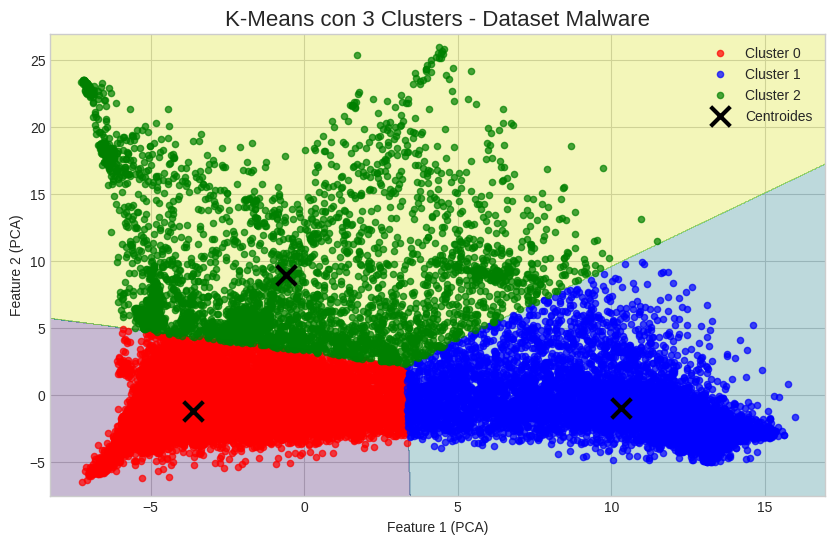


Coordenadas de los centroides:
Cluster 0: (-3.605, -1.197)
Cluster 1: (10.321, -0.987)
Cluster 2: (-0.574, 8.938)


In [23]:
#En 2d para 3clupters
columna_etiquetas = 'labesl'

if columna_etiquetas in df.columns:
    # Guardamos las etiquetas verdaderas para comparar después
    y_true = df[columna_etiquetas]
    print(f"✓ Etiquetas verdaderas encontradas: {y_true.unique()}")

    df_sin_etiquetas = df.drop(columns=[columna_etiquetas])
else:
    print(f"No se encontró la columna ")
    df_sin_etiquetas = df.copy()

# Tomamos solo las columnas numéricas
df_numerico = df_sin_etiquetas.select_dtypes(include=[np.number])

# Normalizamos los datos
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(df_numerico)

pca = PCA(n_components=2)
X = pca.fit_transform(datos_normalizados)

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(X)

print(f"Clusters encontrados: {np.unique(y_pred)}")
print(f"Distribución de clusters: {np.bincount(y_pred)}")

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    """Visualiza las fronteras de decisión del modelo KMeans."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.figure(figsize=(10, 6))

# PRIMERO: Graficamos las fronteras de decisión (los mosaicos)
plot_decision_boundaries(kmeans, X)

# SEGUNDO: Graficamos los puntos coloreados por cluster
colores = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(n_clusters):
    mask = y_pred == i
    plt.scatter(X[mask, 0], X[mask, 1], s=20, c=colores[i],
                alpha=0.7, label=f'Cluster {i}')

# TERCERO: Graficamos los centroides
centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1],
            c='black', marker='x', s=200, linewidths=3, label='Centroides')

plt.title(f"K-Means con {n_clusters} Clusters - Dataset Malware", fontsize=16)
plt.xlabel("Feature 1 (PCA)")
plt.ylabel("Feature 2 (PCA)")
plt.legend()
plt.show()

# Información adicional
print(f"\nCoordenadas de los centroides:")
for i, centroide in enumerate(centroides):
    print(f"Cluster {i}: ({centroide[0]:.3f}, {centroide[1]:.3f})")

Captura que se hizo con 2 clupsters para kmeans: 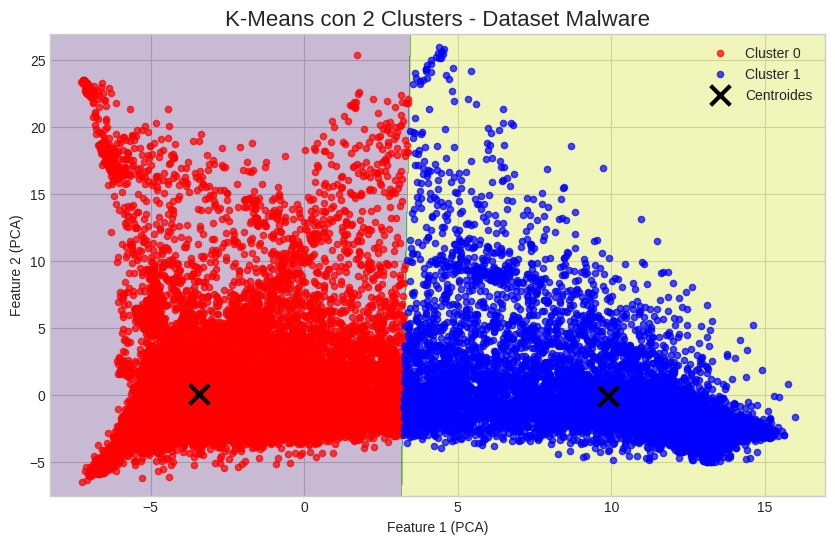

# **¿Cómo saber el valor de k?**

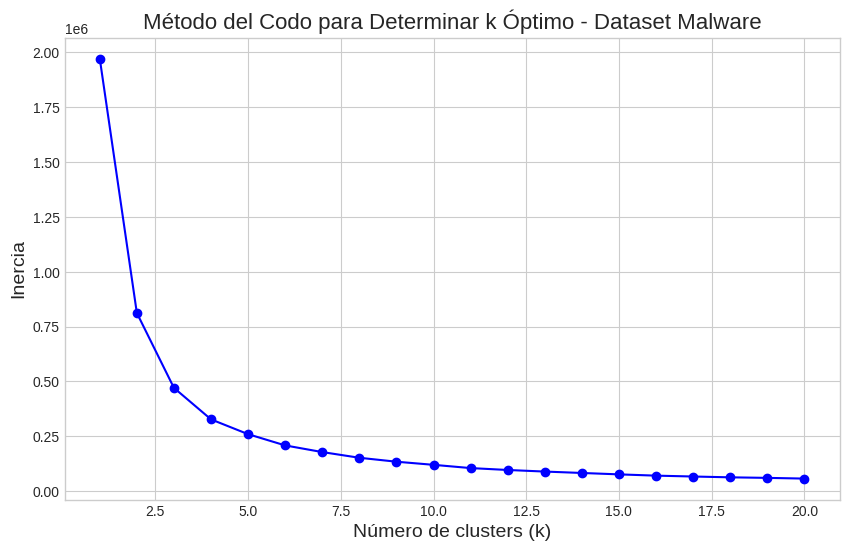

In [25]:
# PARTE 5: MÉTODO DEL CODO PARA ENCONTRAR EL NÚMERO ÓPTIMO DE CLUSTERS

k_range = range(1, 21)
inertias = []

# Probamos diferentes valores de k
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X)
    inertias.append(model.inertia_)

# Visualizamos el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel("Número de clusters (k)", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.title("Método del Codo para Determinar k Óptimo - Dataset Malware", fontsize=16)
plt.grid(True)
plt.show()

Al parecer nos muestra alñgo contraditorio ya que segun habiamos visto que el dataset tiene dos etiquetas, cosa que es extraño ya que el metodo el codo nos dice que la mejor k es entre el 4 y el 5, ya que no hay mucha mejora a partir de ahi si aumentamos mas k.


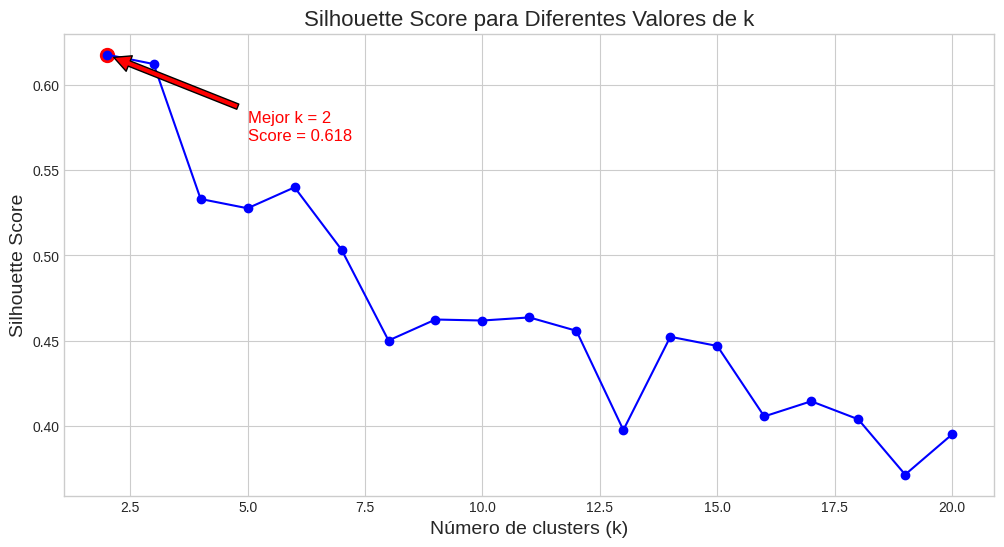

In [26]:
# ----
# PARTE 10: SILHOUETTE SCORE
# ----

kmeans_per_k = [KMeans(n_clusters=k, random_state=None).fit(X) for k in range(1, 21)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
optimal_k_silhouette = np.argmax(silhouette_scores) + 2

plt.figure(figsize=(12, 6))
plt.plot(range(2, 21), silhouette_scores, "bo-")
plt.xlabel("Número de clusters (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Silhouette Score para Diferentes Valores de k", fontsize=16)
plt.grid(True)
plt.annotate(f'Mejor k = {optimal_k_silhouette}\nScore = {silhouette_scores[optimal_k_silhouette-2]:.3f}',
             xy=(optimal_k_silhouette, silhouette_scores[optimal_k_silhouette-2]),
             xytext=(optimal_k_silhouette+3, silhouette_scores[optimal_k_silhouette-2]-0.05),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')
plt.scatter([optimal_k_silhouette], [silhouette_scores[optimal_k_silhouette-2]], c='red', s=100)
plt.show()

Pero con ayuda del SILHOUETTE SCORE, nos damos cuenta que si como estaba a un principio etiquetado la mejor k es 2


=== ANÁLISIS DE SILUETA ===
Calculando modelos K-Means y scores de silueta...
Calculando k=2... Score: 0.618
Calculando k=3... Score: 0.612
Calculando k=4... Score: 0.533
Calculando k=5... Score: 0.524
Calculando k=6... Score: 0.539
Calculando k=7... Score: 0.503
Calculando k=8... Score: 0.445
Calculando k=9... Score: 0.462
Calculando k=10... Score: 0.467
Calculando k=11... Score: 0.464
Calculando k=12... Score: 0.458
Calculando k=13... Score: 0.455
Calculando k=14... Score: 0.452
Calculando k=15... Score: 0.402
Calculando k=16... Score: 0.404
Calculando k=17... Score: 0.399
Calculando k=18... Score: 0.399
Calculando k=19... Score: 0.390
Calculando k=20... Score: 0.395

K óptimo según silueta: 2
Score máximo: 0.618


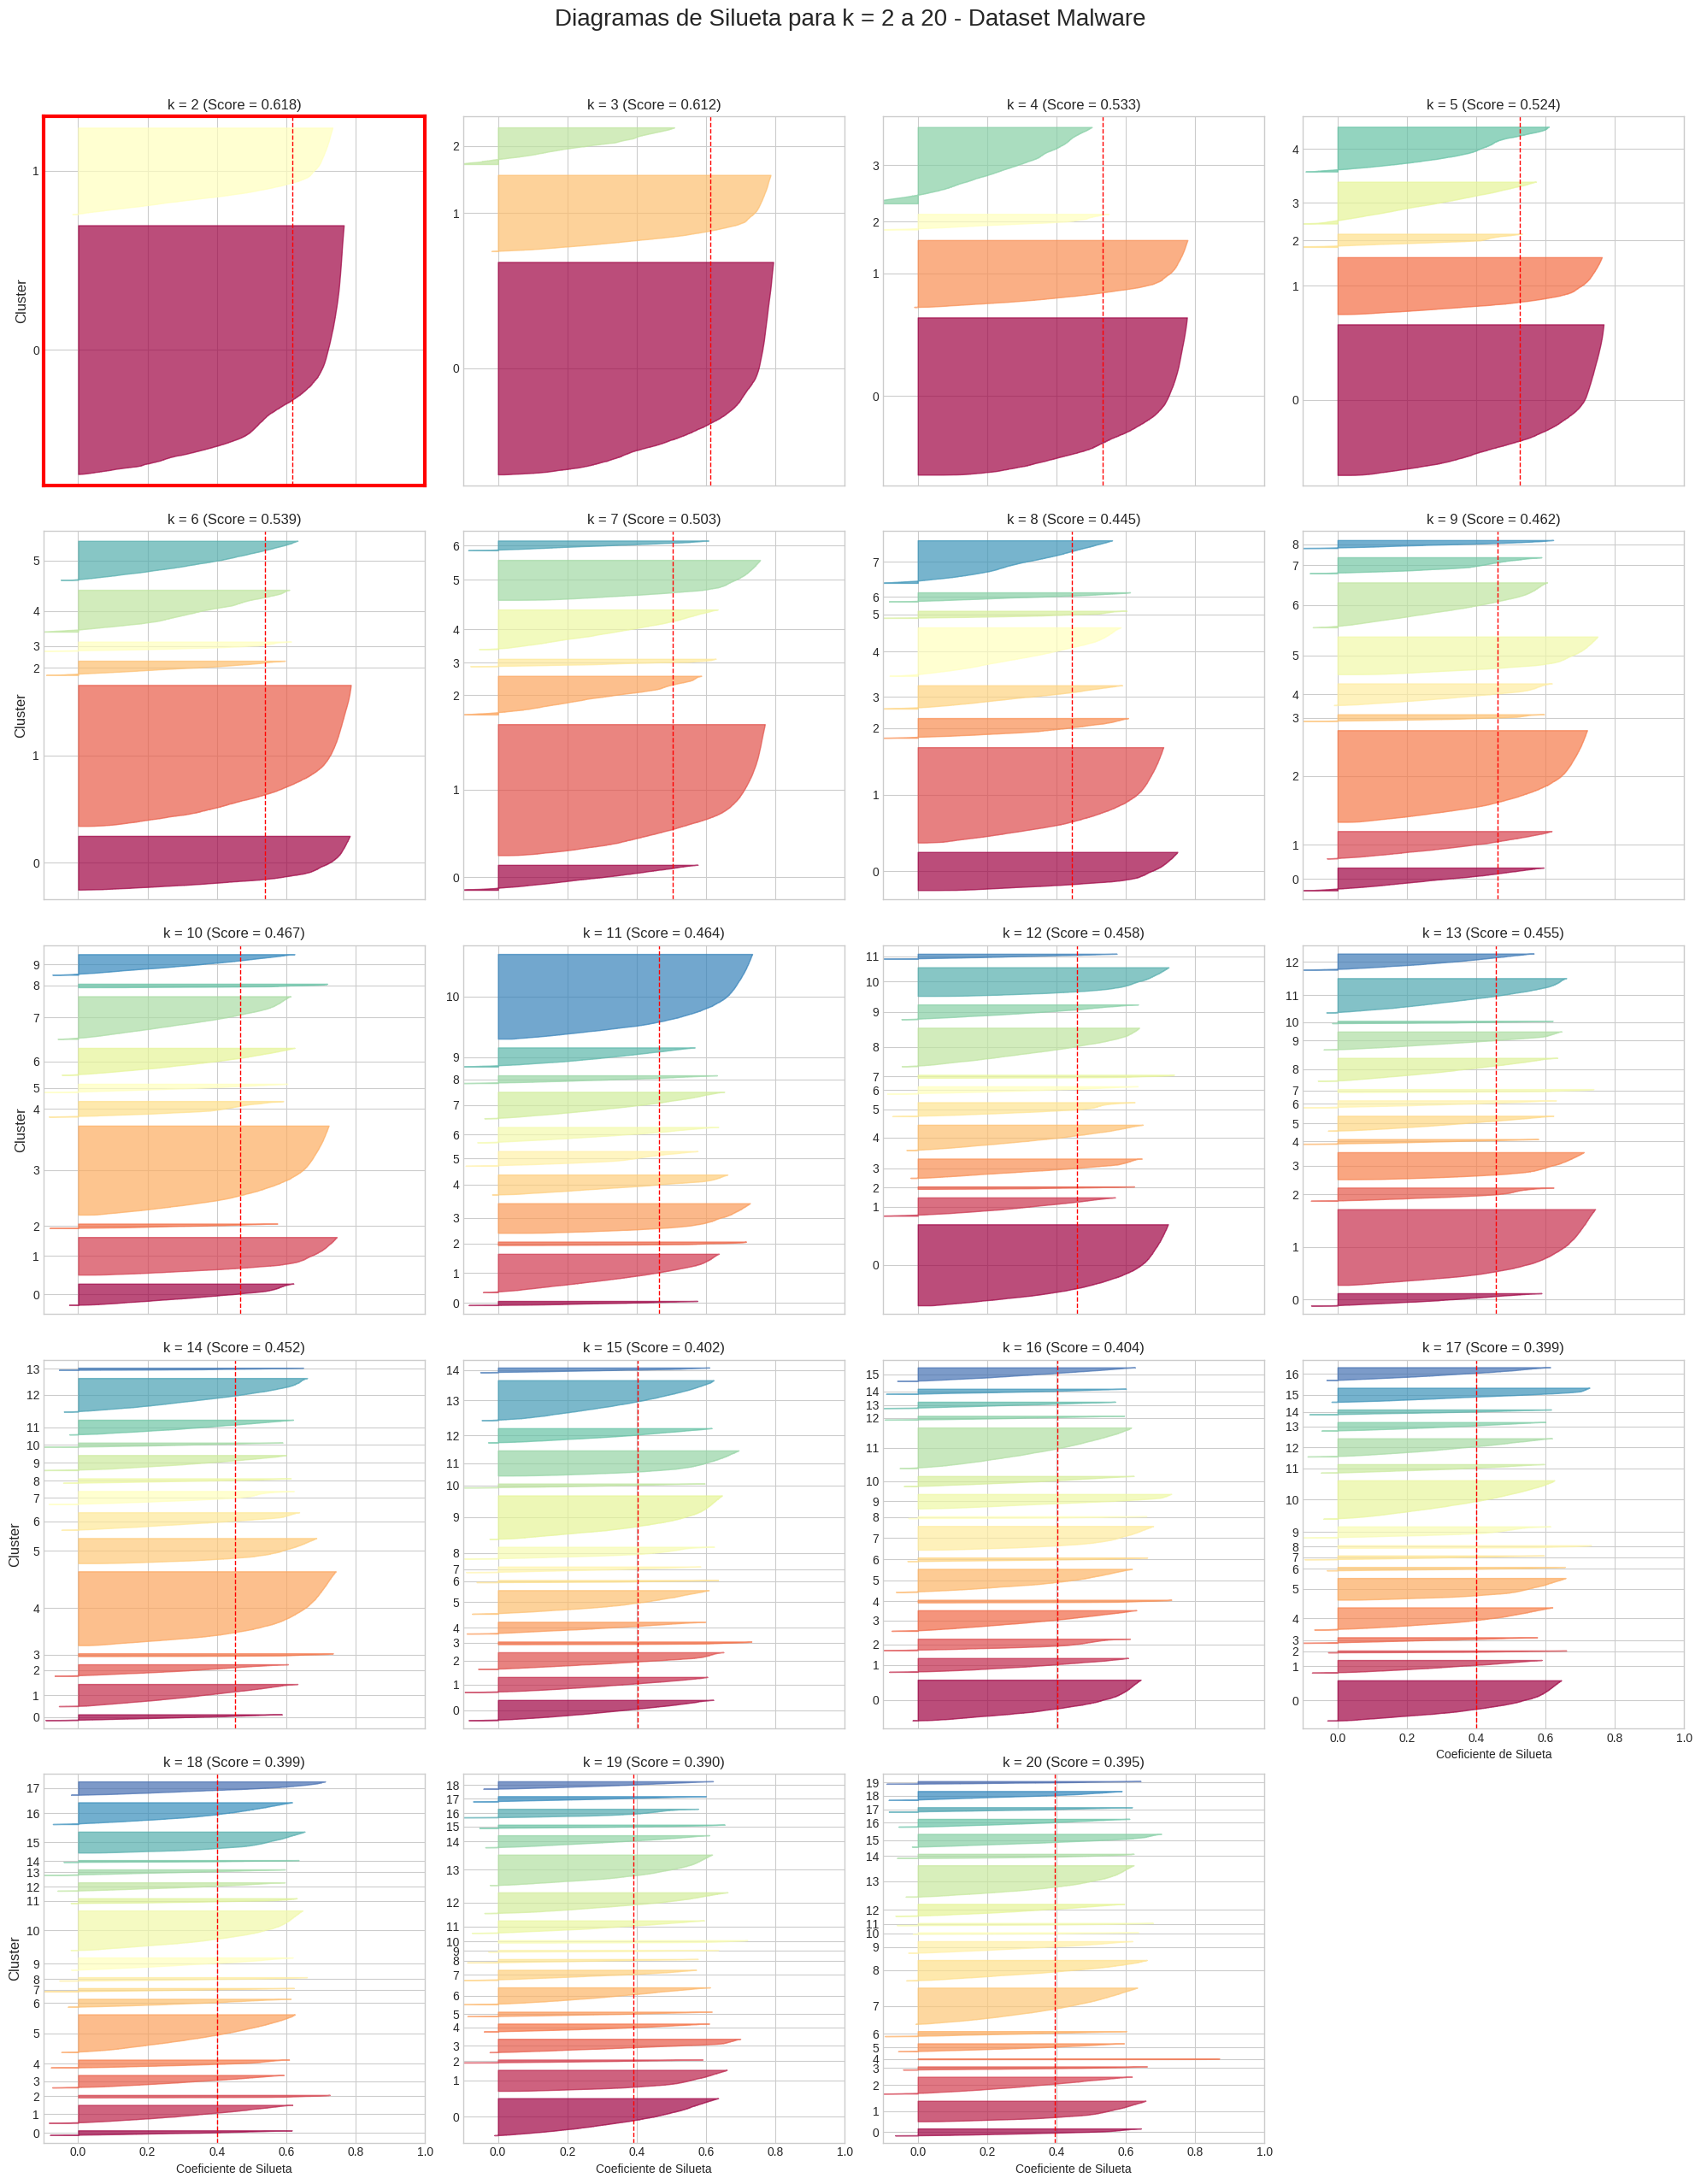


=== RESUMEN DE ANÁLISIS DE SILUETA ===
Scores de silueta por k:
k=2: 0.618 ← ÓPTIMO
k=3: 0.612
k=4: 0.533
k=5: 0.524
k=6: 0.539
k=7: 0.503
k=8: 0.445
k=9: 0.462
k=10: 0.467
k=11: 0.464
k=12: 0.458
k=13: 0.455
k=14: 0.452
k=15: 0.402
k=16: 0.404
k=17: 0.399
k=18: 0.399
k=19: 0.390
k=20: 0.395

Interpretación:
- Scores cercanos a 1: Clusters bien separados
- Scores cercanos a 0: Clusters superpuestos
- Scores negativos: Puntos mal asignados
- Para malware detection, k=2 debería tener buen score


In [29]:
# PARTE 6: DIAGRAMAS DE SILUETA COMPLETOS PARA DATASET DE MALWARE
# (SIN USAR ETIQUETAS - MÉTODO NO SUPERVISADO)

import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

print("=== ANÁLISIS DE SILUETA ===")
print("Calculando modelos K-Means y scores de silueta...")

# Calculamos K-Means para diferentes valores de k y guardamos los scores
k_range = range(2, 21)  # Silueta necesita al menos 2 clusters
kmeans_per_k = []
silhouette_scores = []

for k in k_range:
    print(f"Calculando k={k}...", end=" ")
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_pred = kmeans_model.fit_predict(X)  # Usamos los datos con PCA
    score = silhouette_score(X, y_pred)

    kmeans_per_k.append(kmeans_model)
    silhouette_scores.append(score)
    print(f"Score: {score:.3f}")

# Encontramos el k óptimo según silueta
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"\nK óptimo según silueta: {optimal_k_silhouette}")
print(f"Score máximo: {max(silhouette_scores):.3f}")

# DIAGRAMAS DE SILUETA COMPLETOS
plt.figure(figsize=(20, 25))
plt.suptitle("Diagramas de Silueta para k = 2 a 20 - Dataset Malware", fontsize=20, y=1.02)

for i, k in enumerate(k_range):
    plt.subplot(5, 4, i+1)
    y_pred = kmeans_per_k[i].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    padding = len(X) // 30
    pos = padding
    ticks = []

    for j in range(k):
        coeffs = silhouette_coefficients[y_pred == j]
        coeffs.sort()
        color = mpl.cm.Spectral(j / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if i % 4 == 0:
        plt.ylabel("Cluster", fontsize=12)
    plt.axvline(x=silhouette_scores[i], color="red", linestyle="--", linewidth=1)
    if k == optimal_k_silhouette:
        for spine in plt.gca().spines.values():
            spine.set_color('red')
            spine.set_linewidth(3)
    plt.title(f"k = {k} (Score = {silhouette_scores[i]:.3f})", fontsize=12)
    plt.xlim(-0.1, 1)
    plt.ylim(0, pos)
    if k > 16:
        plt.xlabel("Coeficiente de Silueta", fontsize=10)
    else:
        plt.tick_params(labelbottom=False)

plt.tight_layout()
plt.show()

# Resumen de resultados
print(f"\n=== RESUMEN DE ANÁLISIS DE SILUETA ===")
print(f"Scores de silueta por k:")
for k, score in zip(k_range, silhouette_scores):
    marca = " ← ÓPTIMO" if k == optimal_k_silhouette else ""
    print(f"k={k}: {score:.3f}{marca}")

print(f"\nInterpretación:")
print(f"- Scores cercanos a 1: Clusters bien separados")
print(f"- Scores cercanos a 0: Clusters superpuestos")
print(f"- Scores negativos: Puntos mal asignados")
print(f"- Para malware detection, k=2 debería tener buen score")